In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline


In [8]:
# загружаем датасет
boston = datasets.load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [5]:
# Хотим узнать, как обращаться к столбцам bostonDF
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
# полная матрица корреляций
# используем метод Pandas corr()
C = bostonDF.corr(method='pearson')
C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


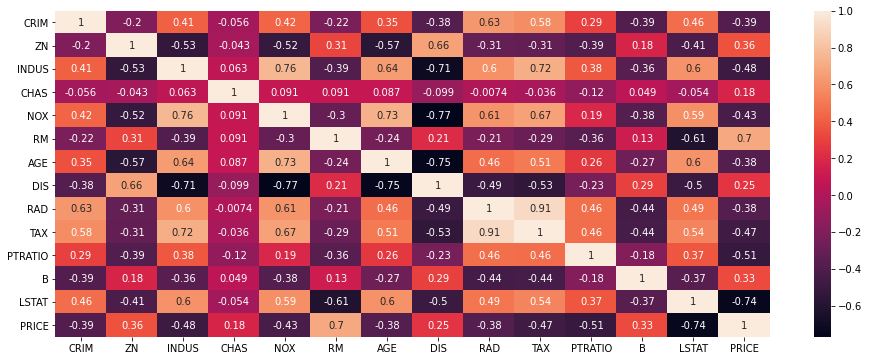

In [10]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

Строим регрессию из видео

In [11]:
Data=bostonDF[['CRIM','RM']]
Data.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [12]:
np.shape(Data)

(506, 2)

In [13]:
# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
CRIM=Data['CRIM']
RM= Data['RM']
A= np.column_stack((np.ones(506), CRIM, RM))
A

array([[1.0000e+00, 6.3200e-03, 6.5750e+00],
       [1.0000e+00, 2.7310e-02, 6.4210e+00],
       [1.0000e+00, 2.7290e-02, 7.1850e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 6.9760e+00],
       [1.0000e+00, 1.0959e-01, 6.7940e+00],
       [1.0000e+00, 4.7410e-02, 6.0300e+00]])

In [14]:
# Добавим настройку для удобного чтения значений А
np.set_printoptions(suppress=True)
A

array([[1.     , 0.00632, 6.575  ],
       [1.     , 0.02731, 6.421  ],
       [1.     , 0.02729, 7.185  ],
       ...,
       [1.     , 0.06076, 6.976  ],
       [1.     , 0.10959, 6.794  ],
       [1.     , 0.04741, 6.03   ]])

In [15]:
# Создаем целевой вектор
y=bostonDF[['PRICE']] # объект типа dataframe - то, что нужно
y_s = bostonDF['PRICE'] #  объект типа series - не подойдет

In [16]:
type(y)

pandas.core.frame.DataFrame

In [17]:
type(y_s)

pandas.core.series.Series

In [18]:
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [19]:
# прогноз
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8
# делаем прогноз типичной соимости дома
PRICE_new=w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
PRICE_new

PRICE    37.857335
dtype: float64

In [20]:
# короткий способ сделать прогноз
new=np.array([1,CRIM_new,RM_new])
new@w_hat

PRICE    37.857335
dtype: float64

In [21]:
# классическая OLS регрессия в numpy одной командой
np.linalg.lstsq(A,y,rcond=None)

# выдаст коэфициенты, сумму квадратов ошибок, ранг матрицы, сингулярные значения матрицы

(array([[-29.24471945],
        [ -0.26491325],
        [  8.39106825]]),
 array([19565.80724199]),
 3,
 array([219.85111475, 127.94826644,   2.38123074]))

Стандартизация данных

In [22]:
Data.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [23]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanCRIM = Data['CRIM'].mean()
meanRM  = Data['RM'].mean()
mean_y = y.mean()
print('mean value of CRIME:', meanCRIM)
print('mean value of RM:', meanRM)
print('mean value of PRICE:', mean_y)

mean value of CRIME: 3.6135235573122535
mean value of RM: 6.284634387351787
mean value of PRICE: PRICE    22.532806
dtype: float64


In [24]:
# Центрирование
CRIM_c = Data['CRIM'] - meanCRIM
RM_c = Data['RM'] - meanRM
y_c = y - mean_y
print('CRIME до центрирования:\n', CRIM.head(4))
print('CRIME после центрирования:\n', CRIM_c.head(4))


CRIME до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIME после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64


In [25]:
print('среднее арифметическое вектора CRIM после центрирования:',CRIM_c.mean())

среднее арифметическое вектора CRIM после центрирования: -3.0524550827243434e-15


In [26]:
# вычисляем длины векторов для нормирования
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of CRIME:\n', CRIM_c_norm)

norm of CRIME:
 193.2956853903625


In [27]:
# Нормирование: делим каждый центрированный вектор на его длину
CRIM_st=CRIM_c / CRIM_c_norm
RM_st=RM_c / RM_c_norm
y_st=y_c / y_c_norm
print('CRIME до центрирования:\n', CRIM.head(4))
print('CRIME после центрирования:\n', CRIM_c.head(4))
print('CRIME после нормирования:\n', CRIM_st.head(4))

CRIME до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIME после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64
CRIME после нормирования:
 0   -0.018662
1   -0.018553
2   -0.018553
3   -0.018527
Name: CRIM, dtype: float64


In [28]:
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( CRIM_st, RM_st,))
A_st

array([[-0.01866158,  0.01838996],
       [-0.01855299,  0.00863655],
       [-0.0185531 ,  0.05702358],
       ...,
       [-0.01837994,  0.04378681],
       [-0.01812732,  0.03226006],
       [-0.01844901, -0.01612696]])

In [29]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[-0.24775878],
       [ 0.64103965]])

In [30]:
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8
# чтобы сделать прогноз по новым данным, их тоже нужно стандартизировать

In [31]:
# Стандартизация новых данных
CRIM_new_st = (CRIM_new - meanCRIM) / CRIM_c_norm
RM_new_st = (RM_new - meanRM) / RM_c_norm
print('new CRIME st:', CRIM_new_st)
print('new RM st:', RM_new_st)

new CRIME st: -0.018176937318681783
new RM st: 0.10864062828128357


In [32]:
# Прогноз стандартизированного y
y_st_new = w_hat_st[0]*CRIM_new_st + w_hat_st[1]*RM_new_st
print('new PRICE st predict:', y_st_new)

new PRICE st predict: [0.07414645]


Стандартизированный прогноз для нас может не иметь никакого смысла сам по себе, 

поэтому его необходимо пересчитать обратно.

Для этого сделаем операции, обратные стандартизации - умножим на длину центрированного вектора y и прибавим среднее


In [33]:
# Пересчет стандартизированного прогноза в понятный
y_new = y_st_new * y_c_norm + mean_y
print('new PRICE predict:', y_new)

new PRICE predict: PRICE    37.857335
dtype: float64


In [35]:
# Пересчет стандартизированных коэффициентов в обычные
# здесь создаем вектор из единиц, который далее заполним нужными значениями
w_hat_not_st=np.ones((3,1))
w_hat_not_st

array([[1.],
       [1.],
       [1.]])

In [36]:
# Пересчет стандартизированных  коэффициентов в обычные
w_hat_not_st[0]= (- w_hat_st[0] * meanCRIM / CRIM_c_norm - w_hat_st[1] * meanRM / RM_c_norm) * y_c_norm  + y.mean()
w_hat_not_st[1] = (w_hat_st[0] / CRIM_c_norm) * y_c_norm
w_hat_not_st[2] = ( w_hat_st[1] / RM_c_norm )* y_c_norm
w_hat_not_st

array([[-29.24471945],
       [ -0.26491325],
       [  8.39106825]])

In [37]:
# Сравнение с ранее полученными обычными коэффициентами
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [38]:
# Матрица Грама стандартизированных признаков
A_st.T@A_st

array([[ 1.       , -0.2192467],
       [-0.2192467,  1.       ]])

In [39]:
# Матрица корреляций обычных признаков
Data.corr(method='pearson')

,CRIM,RM
CRIM,1.000000,-0.219247
RM,-0.219247,1.000000


In [0]:
# Стандартизированные признаки ортогональны вектору констант

In [40]:
CRIM_st@np.ones(506)

-1.4432899320127035e-15

In [41]:
RM_st@np.ones(506)

-2.5829338667904267e-13

In [0]:
# Решение задачи

In [42]:
import os

In [43]:
print(os.listdir("input"))

['.ipynb_checkpoints', 'Admission_Predict_Ver1.1.csv', 'cacao_flavors_from_slack.csv', 'data.csv', 'log.csv', 'stud_math.csv', 'tips.csv', 'users.csv']


In [74]:
# Загружаем датасет

DF = pd.read_csv('input/Admission_Predict_Ver1.1.csv')
DF

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [46]:
# GRE Scores ( out of 340 ) — баллы по GRE тестированию
# TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
# University Rating ( out of 5 ) — рейтинг университета 
# Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
# Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
# Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
# Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

In [47]:
# Целевой переменной является вероятность приёма в университет — Chance of Admit (ranging from 0 to 1 )

In [75]:
# Хотим узнать, как обращаться к столбцам bostonDF
DF.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [76]:
# Поправим названия колонок
DF.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

In [77]:
# Составьте корреляциюнную матрицу перечисленных признаков вместе с целевой переменной, исключив столбец Serial No.

del DF['Serial No.']

In [78]:
DF

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [79]:
# полная матрица корреляций
# используем метод Pandas corr()
C = DF.corr(method='pearson')
C

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


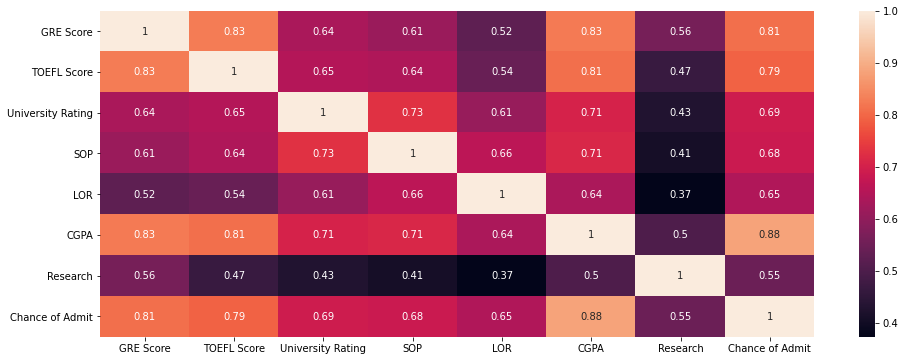

In [80]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

In [81]:
# Отфильтруем в новый датасет данные (возьмем только те данные, которые в колонке Research=1)
DF_Research_1 = DF[DF['Research'] == 1]
DF_Research_1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
5,330,115,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...
493,300,95,2,3.0,1.5,8.22,1,0.62
494,301,99,3,2.5,2.0,8.45,1,0.68
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96


In [82]:
# полная матрица корреляций
# используем метод Pandas corr()
C_Research_1 = DF_Research_1.corr(method='pearson')
C_Research_1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.824170,0.614739,0.613318,0.443374,0.806720,NaN,0.802439
TOEFL Score,0.824170,1.000000,0.602445,0.629436,0.436199,0.784173,NaN,0.787180
University Rating,0.614739,0.602445,1.000000,0.723126,0.573881,0.692237,NaN,0.713094
SOP,0.613318,0.629436,0.723126,1.000000,0.591858,0.717750,NaN,0.708238
LOR,0.443374,0.436199,0.573881,0.591858,1.000000,0.564794,NaN,0.588558
CGPA,0.806720,0.784173,0.692237,0.717750,0.564794,1.000000,NaN,0.892489
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,0.802439,0.787180,0.713094,0.708238,0.588558,0.892489,NaN,1.000000


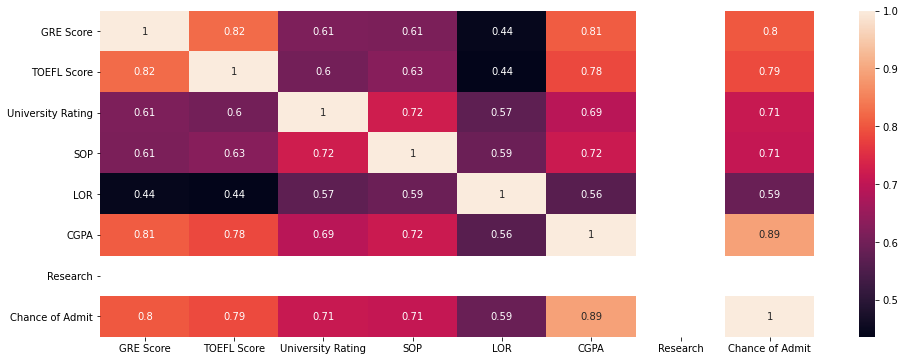

In [83]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C_Research_1, annot=True)

In [84]:
# Отфильтруем в новый датасет данные (возьмем только те данные, которые в колонке Research=0)
DF_Research_0 = DF[DF['Research'] == 0]
DF_Research_0

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
4,314,103,2,2.0,3.0,8.21,0,0.65
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45
15,314,105,3,3.5,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...,...
487,327,115,4,3.5,4.0,9.14,0,0.79
489,302,110,3,4.0,4.5,8.50,0,0.65
491,297,99,4,3.0,3.5,7.81,0,0.54
498,312,103,4,4.0,5.0,8.43,0,0.73


In [85]:
C_Research_0 = DF_Research_0.corr(method='pearson')
C_Research_0

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.680668,0.384715,0.371424,0.365864,0.678476,NaN,0.603827
TOEFL Score,0.680668,1.000000,0.495748,0.476563,0.470956,0.696774,NaN,0.622458
University Rating,0.384715,0.495748,1.000000,0.607496,0.484262,0.516427,NaN,0.428580
SOP,0.371424,0.476563,0.607496,1.000000,0.618680,0.547098,NaN,0.470188
LOR,0.365864,0.470956,0.484262,0.618680,1.000000,0.562517,NaN,0.542528
CGPA,0.678476,0.696774,0.516427,0.547098,0.562517,1.000000,NaN,0.752714
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,0.603827,0.622458,0.428580,0.470188,0.542528,0.752714,NaN,1.000000


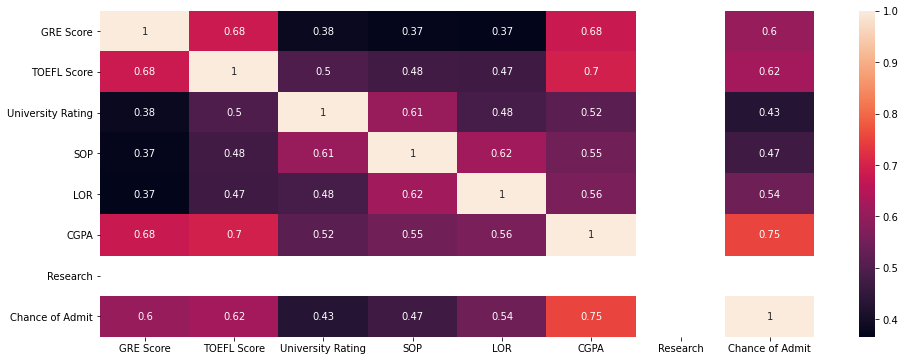

In [86]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C_Research_0, annot=True)

In [87]:
A = C_Research_0.to_numpy()
A

array([[1.        , 0.68066816, 0.38471519, 0.37142398, 0.36586382,
        0.67847633,        nan, 0.60382734],
       [0.68066816, 1.        , 0.49574787, 0.47656294, 0.47095589,
        0.69677372,        nan, 0.62245795],
       [0.38471519, 0.49574787, 1.        , 0.60749587, 0.48426231,
        0.51642666,        nan, 0.42858044],
       [0.37142398, 0.47656294, 0.60749587, 1.        , 0.61868025,
        0.54709779,        nan, 0.47018802],
       [0.36586382, 0.47095589, 0.48426231, 0.61868025, 1.        ,
        0.56251653,        nan, 0.54252793],
       [0.67847633, 0.69677372, 0.51642666, 0.54709779, 0.56251653,
        1.        ,        nan, 0.7527141 ],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [0.60382734, 0.62245795, 0.42858044, 0.47018802, 0.54252793,
        0.7527141 ,        nan, 1.        ]])

In [88]:
# Отфильтруем в новый датасет данные по нужным нам колонкам-признакам
Data=DF_Research_0[['TOEFL Score','CGPA']]
Data

,TOEFL Score,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30
...,...,...
487,115,9.14
489,110,8.50
491,99,7.81
498,103,8.43


In [109]:
# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
TOEFL_Score=Data['TOEFL Score']
CGPA=Data['CGPA']
A= np.column_stack((np.ones(220), TOEFL_Score, CGPA))
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [110]:
# Создаем целевой вектор
y=DF_Research_0[['Chance of Admit']] # объект типа dataframe - то, что нужно
y_s=DF_Research_0['Chance of Admit'] #  объект типа series - не подойдет

y

,Chance of Admit
4,0.65
7,0.68
8,0.50
9,0.45
15,0.54
...,...
487,0.79
489,0.65
491,0.54
498,0.73


In [111]:
# классическая OLS регрессия в numpy одной командой
np.linalg.lstsq(A,y,rcond=None)

# выдаст коэфициенты, сумму квадратов ошибок, ранг матрицы, сингулярные значения матрицы

(array([[-1.04486443],
        [ 0.00442727],
        [ 0.14807744]]),
 array([1.13772786]),
 3,
 array([1548.98055048,    5.02503482,    0.67532963]))

In [114]:
"""
Сделайте прогноз шансов поступления в университет для абитуриента с TOEFL Score=107, CGPA=9.1,
используя модель, полученную в задаче 2.11.6 (используйте округленные значения признаков).
"""

TOEFL_Score_new=107
CGPA_new=9.1

# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

# обычный способ сделать прогноз
Chance_of_Admit_new=w_hat.iloc[0]+w_hat.iloc[1]*TOEFL_Score_new+w_hat.iloc[2]*CGPA_new
print(Chance_of_Admit_new)

# короткий способ сделать прогноз
new=np.array([1,TOEFL_Score_new,CGPA_new])
print(new@w_hat)

   Chance of Admit
0        -1.044864
1         0.004427
2         0.148077
Chance of Admit    0.776359
dtype: float64
Chance of Admit    0.776359
dtype: float64


In [115]:
# Задание 2.11.8

Data.head()

,TOEFL Score,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30


In [116]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanTOEFL_Score = Data['TOEFL Score'].mean()
meanCGPA  = Data['CGPA'].mean()
mean_y = y.mean()
print('mean value of TOEFL Score:', meanTOEFL_Score)
print('mean value of CGPA:', meanCGPA)
print('mean value of Chance of Admit:', mean_y)

mean value of TOEFL Score: 103.99090909090908
mean value of CGPA: 8.234727272727275
mean value of Chance of Admit: Chance of Admit    0.634909
dtype: float64


In [118]:
# Центрирование
TOEFL_Score_c = Data['TOEFL Score'] - meanTOEFL_Score
CGPA_c = Data['CGPA'] - meanCGPA
y_c = y - mean_y
print('TOEFL Score до центрирования:\n', TOEFL_Score.head(4))
print('TOEFL Score после центрирования:\n', TOEFL_Score_c.head(4))

TOEFL Score до центрирования:
 4    103
7    101
8    102
9    108
Name: TOEFL Score, dtype: int64
TOEFL Score после центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL Score, dtype: float64


In [119]:
print('среднее арифметическое вектора TOEFL Score после центрирования:',TOEFL_Score_c.mean())

среднее арифметическое вектора TOEFL Score после центрирования: 5.2321783269607375e-15


In [120]:
# вычисляем длины векторов для нормирования
TOEFL_Score_c_norm = np.linalg.norm(TOEFL_Score_c)
CGPA_c_norm = np.linalg.norm(CGPA_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of TOEFL Score:\n', TOEFL_Score_c_norm)

norm of TOEFL Score:
 71.24592492333733


In [121]:
# Нормирование: делим каждый центрированный вектор на его длину
TOEFL_Score_st=TOEFL_Score_c / TOEFL_Score_c_norm
CGPA_st=CGPA_c / CGPA_c_norm
y_st=y_c / y_c_norm
print('TOEFL Score до центрирования:\n', TOEFL_Score.head(4))
print('TOEFL Score после центрирования:\n', TOEFL_Score_c.head(4))
print('TOEFL Score после нормирования:\n', TOEFL_Score_st.head(4))

TOEFL Score до центрирования:
 4    103
7    101
8    102
9    108
Name: TOEFL Score, dtype: int64
TOEFL Score после центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL Score, dtype: float64
TOEFL Score после нормирования:
 4   -0.013908
7   -0.041980
8   -0.027944
9    0.056271
Name: TOEFL Score, dtype: float64


In [122]:
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( TOEFL_Score_st, CGPA_st,))
A_st

array([[-0.01390829, -0.00356568],
       [-0.04198007, -0.04826775],
       [-0.02794418, -0.03384772],
       [ 0.05627116,  0.05267241],
       [ 0.01416349,  0.00941234],
       [ 0.04223527,  0.06709243],
       [ 0.08434294,  0.08151245],
       [-0.02794418,  0.03825238],
       [ 0.1404865 ,  0.02383236],
       [ 0.07030705,  0.08151245],
       [-0.1542672 , -0.1492079 ],
       [-0.07005185, -0.13478788],
       [ 0.02819938,  0.02383236],
       [ 0.01416349, -0.06268777],
       [ 0.01416349, -0.10594783],
       [ 0.05627116, -0.07710779],
       [ 0.18259418,  0.12477251],
       [ 0.21066596,  0.21129264],
       [ 0.08434294, -0.03384772],
       [-0.01390829, -0.07710779],
       [-0.02794418, -0.12036785],
       [-0.07005185, -0.09152781],
       [ 0.0001276 ,  0.00941234],
       [-0.05601596, -0.0194277 ],
       [-0.04198007, -0.00500768],
       [ 0.09837883,  0.06709243],
       [ 0.11241472,  0.09881648],
       [ 0.1404865 ,  0.1132365 ],
       [ 0.02819938,

In [123]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[0.19044768],
       [0.62001517]])

In [ ]:
x1 = np.array([1,2,1,1])
x2 = (70,130,65,60).T

# вычисляем длины векторов для нормирования
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of CRIME:\n', CRIM_c_norm)

In [126]:
N = np.ones((2000, 8000))
N

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [132]:
K = np.corrcoef(N)
K.shape

(2000, 2000)